### CLUSTERING

In [ ]:
!git clone https://github.com/abhishict/TextMiningProject.git

Cloning into 'TextMiningProject'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 5), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 1.93 MiB | 10.85 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_comments = pd.read_csv('TextMiningProject/data/cleaned_dataset.csv')
print(df_comments.shape)
df_comments.head()

(5184, 4)


,Label,Description,Cleaned_Description,Article_Length
0,Environmental Concern,Brake pad dust can be more toxic than exhaust ...,brake pad dust toxic exhaust emission study say,8
1,Environmental Benefit,EVs and datacentres driving new global ‘age of...,datacentres driving global age electricity say...,7
2,Economic Challenge,EV drivers spend extra £85m on VAT when using ...,driver spend extra vat using public charger,7
3,Economic Challenge,UK used electric vehicle sales hit record last...,uk used sale hit record last price fell,8
4,Environmental Benefit,Promoting green growth does not make you an ‘e...,promoting green growth econutter way forward,6


In [ ]:
df_comments['Label'].value_counts()

,count
Label,
Pro-EV,1303
Against-EV,918
Environmental Benefit,732
General Pro,720
General Against,410
Economic Challenge,398
Economic Advantage,394
Environmental Concern,309


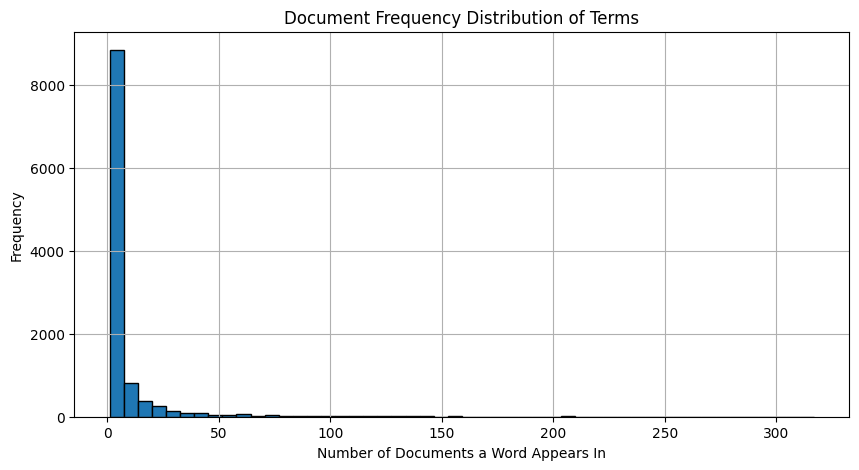

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Vectorize without filtering
raw_vectorizer = CountVectorizer()
X_raw = raw_vectorizer.fit_transform(df_comments['Cleaned_Description'])

# Calculate document frequency of each word
df_counts = (X_raw > 0).sum(axis=0).A1
vocab = raw_vectorizer.get_feature_names_out()

# Plot histogram of document frequencies
plt.figure(figsize=(10, 5))
plt.hist(df_counts, bins=50, edgecolor='black')
plt.title("Document Frequency Distribution of Terms")
plt.xlabel("Number of Documents a Word Appears In")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_comments = df_comments.dropna(subset=['Cleaned_Description'])

# Vectorize the cleaned descriptions using TF-IDF
vectorizer = TfidfVectorizer( stop_words='english',
                              min_df=20, max_df=0.7)
X_tfidf = vectorizer.fit_transform(df_comments['Cleaned_Description'])

X_dense = X_tfidf.toarray()

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_dense)


df_scaled = pd.DataFrame(X_scaled, columns=vectorizer.get_feature_names_out())

# Preview the DataFrame
df_scaled.head()

,able,absolutely,access,according,account,achieve,act,action,actual,actually,...,worst,worth,write,wrong,yeah,yes,york,yous,zero,zeroemission
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


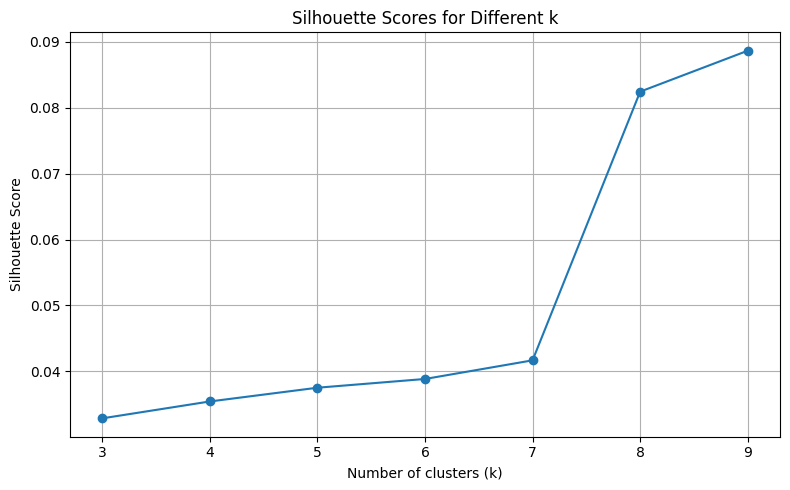

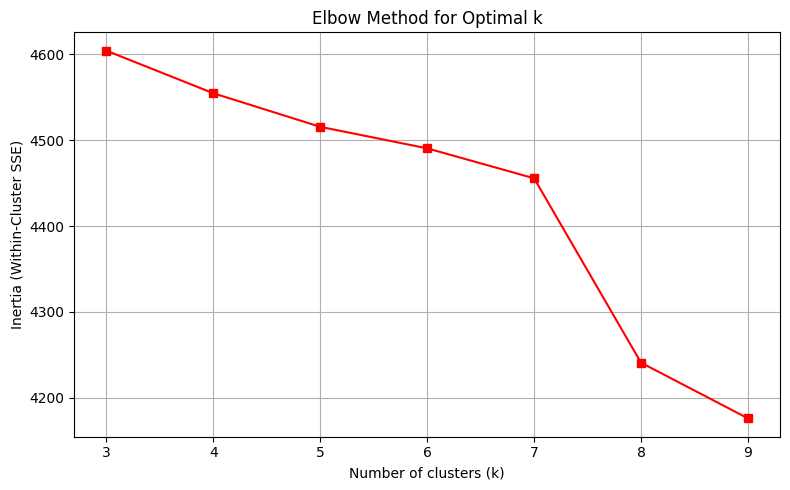

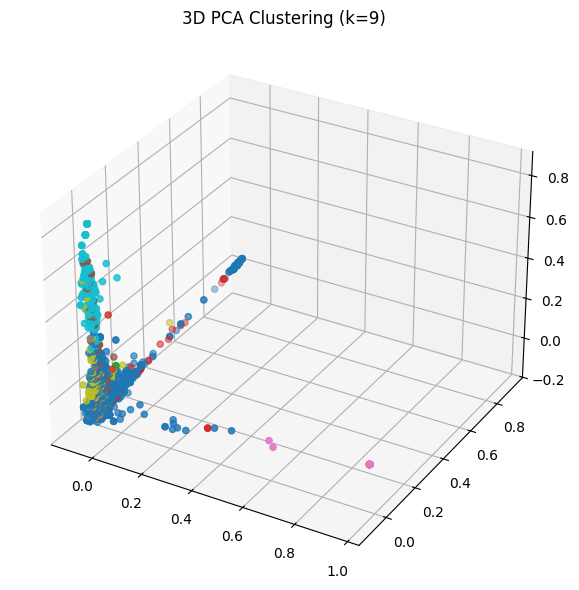

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Preprocess and vectorize
df_comments = df_comments.dropna(subset=['Cleaned_Description'])

vectorizer = TfidfVectorizer(stop_words='english',
                             max_features=200,
                             min_df=20, max_df=0.7)
X_tfidf = vectorizer.fit_transform(df_comments['Cleaned_Description'])

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_tfidf.toarray())

# PCA to 3D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# KMeans with Silhouette and Elbow methods
k_values = [3, 4, 5, 6, 7, 8, 9]
kmeans_models = {}
silhouette_scores = {}
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    kmeans_models[k] = (kmeans, labels)
    silhouette_scores[k] = silhouette_score(X_scaled, labels)
    inertias.append(kmeans.inertia_)

# --- Plot Silhouette Scores ---
plt.figure(figsize=(8, 5))
plt.plot(k_values, list(silhouette_scores.values()), marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot Elbow Curve (Inertia) ---
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='s', color='red')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3D Visualization of Best Clustering ---
best_k = max(silhouette_scores, key=silhouette_scores.get)
best_model, best_labels = kmeans_models[best_k]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=best_labels, cmap='tab10', s=20)
ax.set_title(f'3D PCA Clustering (k={best_k})')
plt.tight_layout()
plt.show()


In [ ]:
values, counts = np.unique(labels, return_counts=True)

for val, count in zip(values, counts):
    print(f"{val}: {count}")

0: 4262
1: 92
2: 69
3: 116
4: 77
5: 218
6: 79
7: 257


In [ ]:
import plotly.express as px
import pandas as pd

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Loop over selected k-values and plot each with Plotly
for k in [3, 4, 8]:
    kmeans, labels = kmeans_models[k]

    # Create DataFrame for Plotly
    df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
    df_plot['Cluster'] = labels.astype(str)  # Convert to string for coloring

    # Create interactive 3D plot
    fig = px.scatter_3d(
        df_plot,
        x='PC1', y='PC2', z='PC3',
        color='Cluster',
        title=f"3D PCA Clustering (k = {k})",
        opacity=0.75,
        width=900, height=600
    )

    fig.show()


### CREATING TRANSACTION DATA FOR ARM

In [ ]:
np.percentile(df_comments['Article_Length'], 90)
max_length = int(np.percentile(df_comments['Article_Length'], 90))

In [ ]:
import pandas as pd
from collections import Counter

# Define custom stopword-like list
word_list = [
    'newsletter', 'weekend', 'click', 'weekly', 'dedicated', 'inbox', 'sign', 'receive',
    'hi', 'hello', 'welcome', 'reader', 'every', 'can', 'just', 'like', 'also', 'get',
    'go', 'back', 'day', 'good', 'really', 'make', 'time', 'even', 'said', 'says',
    'still', 'new', 'know'
]

# Tokenize early
df_comments = df_comments.dropna(subset=['Cleaned_Description'])
tokenized = df_comments["Cleaned_Description"].str.lower().str.split()

# Flatten for word frequency count
all_words = [word for sublist in tokenized for word in sublist]
word_freq = Counter(all_words)

# Define frequency thresholds
min_freq = 15
max_freq = 0.1 * len(tokenized)

# Get allowed words based on frequency and custom exclusion
allowed_words = {
    word for word, freq in word_freq.items()
    if min_freq <= freq <= max_freq and word not in word_list
}

# Filter tokenized list
filtered_tokenized = tokenized.apply(lambda tokens: [w for w in tokens if w in allowed_words])

# Drop empty rows
filtered_tokenized = filtered_tokenized[filtered_tokenized.str.len() > 0]

# Convert to formatted DataFrame (wide format)
transactions_df_formatted = pd.DataFrame(filtered_tokenized.tolist())
transactions_df_formatted = transactions_df_formatted.applymap(lambda x: x if pd.notna(x) else '')

# Drop empty columns
transactions_df_formatted = transactions_df_formatted.loc[:, (transactions_df_formatted != '').any(axis=0)]

# Preview
transactions_df_formatted.head()


<ipython-input-53-54eaf51eb1e8>:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:

transactions_df_truncated = transactions_df_formatted.iloc[:, :max_length]

In [ ]:
transactions_df_truncated.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,brake,pad,dust,toxic,exhaust,emission,study,say,,,...,,,,,,,,,,
1,datacentres,driving,global,age,electricity,say,watchdog,,,,...,,,,,,,,,,
2,driver,spend,extra,vat,using,public,charger,,,,...,,,,,,,,,,
3,uk,used,sale,hit,record,last,price,fell,,,...,,,,,,,,,,
4,promoting,green,growth,econutter,way,forward,,,,,...,,,,,,,,,,


In [ ]:
transactions_df_formatted.to_csv("transactions_reviews.csv", index=False, header=False)

### LDA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
df_comments = pd.read_csv('TextMiningProject/data/cleaned_dataset.csv')
df_comments = df_comments.dropna(subset=['Cleaned_Description'])

# Create CountVectorizer
MyCountV = CountVectorizer(max_features=100, max_df=0.7, min_df=5, stop_words='english')
MyDTM_DF = MyCountV.fit_transform(df_comments['Cleaned_Description'])

# Fit LDA Model
num_topics = 8
lda_model_DH = LatentDirichletAllocation(n_components=num_topics,
                                         max_iter=100,
                                         learning_method='online',
                                         random_state=42)
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

# Topic Inspection
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic #{idx}")
        print([(vectorizer.get_feature_names_out()[i], topic[i])
               for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(lda_model_DH, MyCountV, 30)


Topic #0
[('charging', np.float64(332.5511777261979)), ('weekly', np.float64(215.33128592612957)), ('hybrid', np.float64(200.80882764783618)), ('road', np.float64(179.4632170983939)), ('range', np.float64(166.31940412017812)), ('industry', np.float64(165.03057169266032)), ('end', np.float64(133.75258846057892)), ('production', np.float64(130.914434041662)), ('uk', np.float64(117.81697091976078)), ('build', np.float64(91.2642041412114)), ('point', np.float64(43.980121167901515)), ('work', np.float64(0.12529646889941864)), ('mile', np.float64(0.1252658158801731)), ('making', np.float64(0.1251883827024089)), ('home', np.float64(0.1251865351554512)), ('charge', np.float64(0.12518627009357017)), ('actually', np.float64(0.12517978158886126)), ('model', np.float64(0.12517829163728636)), ('driving', np.float64(0.12517288850210537)), ('drive', np.float64(0.1251678292257435)), ('gas', np.float64(0.12516571138473578)), ('time', np.float64(0.1251633405428454)), ('government', np.float64(0.12516071

In [ ]:
count_df = pd.DataFrame(MyDTM_DF.toarray(), columns=MyCountV.get_feature_names_out())
count_df = count_df.dropna()
count_df.head()

,actually,automaker,better,big,billion,build,business,buy,carbon,change,...,use,used,using,want,way,week,weekly,welcome,work,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


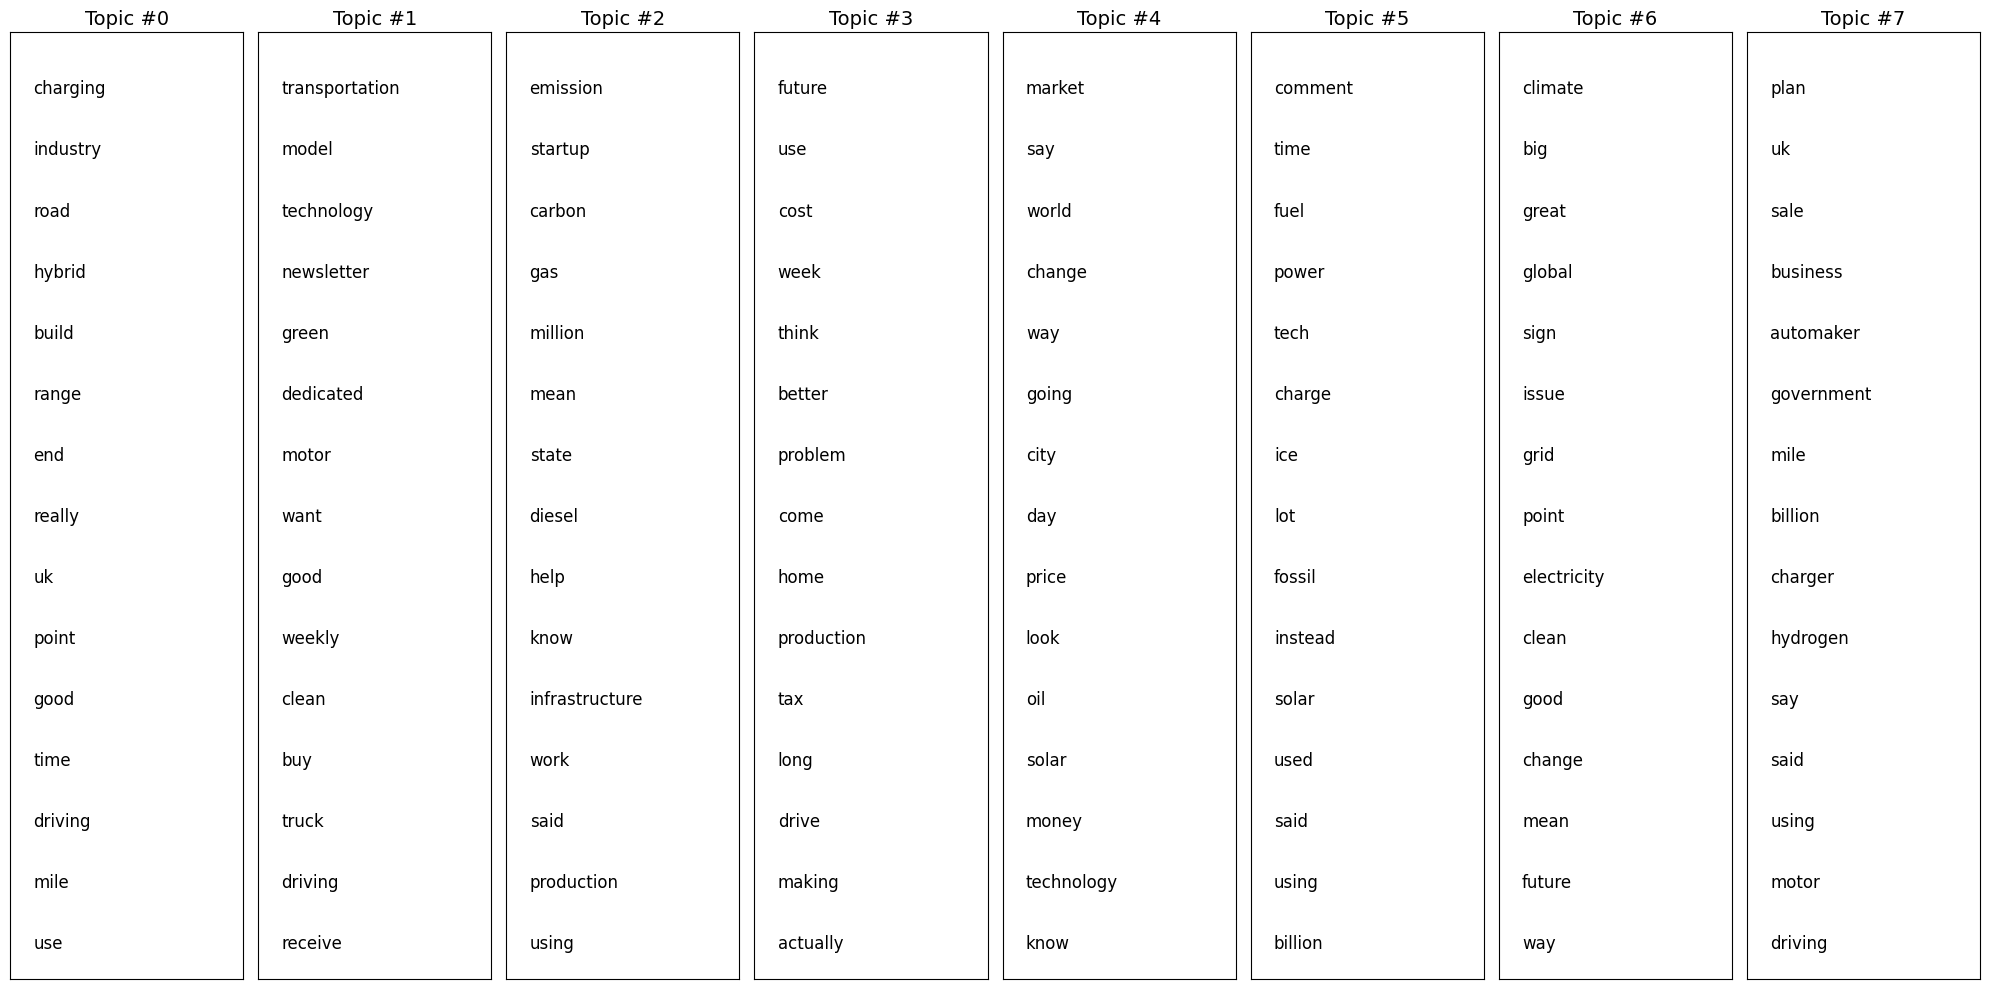

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

word_topic = np.array(lda_model_DH.components_).T
vocab_array = np.asarray(MyCountV.get_feature_names_out())
num_top_words = 15
fontsize_base = 12

# Dynamically scale figure width by number of topics
plt.figure(figsize=(2.5 * num_topics, 10))

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)
    plt.ylim(0, num_top_words + 0.5)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Topic #{t}', fontsize=14)

    # Get top word indices for this topic only
    top_idx = np.argsort(word_topic[:, t])[::-1][:num_top_words]
    top_words = vocab_array[top_idx]

    for i, word in enumerate(top_words):
        plt.text(0.1, num_top_words - i - 0.5, word, fontsize=fontsize_base)

plt.tight_layout()
plt.show()
